In [85]:
from pathlib import Path
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

import nemplot
nemplot_parameters = nemplot.nemplot_parameters.copy()

In [44]:
DICT_LINES = 18
K_CRITIC = 0.002
K_STEP = 0.001
LARGE_MAGNET_MAPS_FILE = "map_Rs_large.txt"
V_PMM_MIN = 10
V_PMM_MAX = 250

In [10]:
os.chdir(str(Path.home() / "code" / "TeslaMax"))

In [11]:
os.getcwd()

'C:\\Users\\fabiofortkamp\\code\\TeslaMax'

In [12]:
def filter_table_from_column(table,column,value):
    """
    Return a view into the 'table' DataFrame, selecting only the rows where
    'column' equals 'value'
    """
    
    return table[table[column] == value]

In [21]:
def parse_large_magnet_vectors():
    """
    Return a pandas DataFrame of the large magnet maps file
    """
    
    file_path = Path(LARGE_MAGNET_MAPS_FILE)
    
    # read the parameters at the header of the file,
    # to extract the number of segments and format the table
    with open(file_path) as f:
        flines = f.readlines()
    
    params = eval("".join(flines[0:DICT_LINES]))
    
    map_table = pd.read_csv(file_path,sep='\s+',skiprows=DICT_LINES+1,header=0)
    return map_table

In [22]:
def get_large_magnet_vectors(Q_c_reg):
    """
    Return (Q_c, V_PMM) as arrays to be plotted, 
    based on the optimization maps for large magnets for 'Q_c_reg' (capacity per regenerator)
    """
    
    map_table = parse_large_magnet_vectors()
    map_table = filter_table_from_column(map_table,'Q_c_reg[W]',Q_c_reg)

    Q_c = map_table["Q_c[W]"].values
    V_PMM = map_table["V_PMM[L]"].values
    
    return (Q_c,V_PMM)

In [90]:
def plot_large_magnet_volume():
    
        
    fig, ax = nemplot.create_plot(xlabel=r'$\qc\,[\si{\kilo\watt}]$',
                             ylabel=r'$\vv\ped{PMM}\,[\si{\liter}]$')
    
    large_map = parse_large_magnet_vectors()
    Q_c_reg_values = large_map["Q_c_reg[W]"].unique()
    Q_c_values = 1e-3*large_map["Q_c[W]"].unique()
    
    for Q_c_reg in Q_c_reg_values:
        
        Q_c, V_PMM = get_large_magnet_vectors(Q_c_reg)
        label_text = r'$\rate{Q}\ped{c,reg} = \SI{' + '%d' %(Q_c_reg) + '}{\watt}$'
        
        ax.plot(1e-3*Q_c,V_PMM,'s--',label=label_text)
        
    ax.legend(loc="best",fontsize=0.9*nemplot_parameters["FONTSIZE"])
    ax.grid(True)
    
    ax.set_xlim(*Q_c_values)
    ax.set_xticks(Q_c_values)
    
    ax.set_ylim(V_PMM_MIN,V_PMM_MAX)
    ax.set_yticks(np.linspace(V_PMM_MIN,V_PMM_MAX,13))
    nemplot.refine_yticks(ax,5)

    nemplot.save_figure(fig,"map_Rs_large")

In [66]:
map = parse_large_magnet_vectors()
tuple(map["Q_c[W]"].unique())

(2000, 8000)

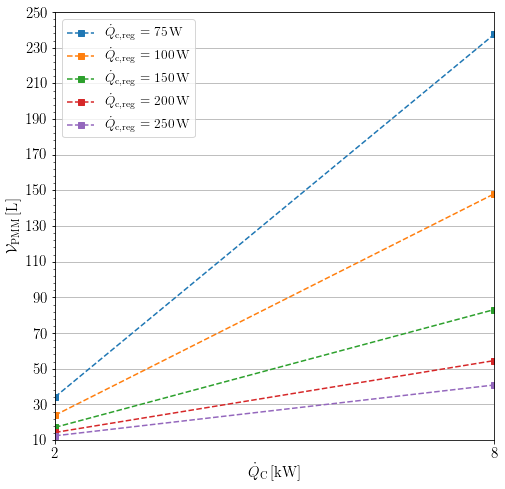

In [91]:
%matplotlib inline
plot_large_magnet_volume()